## **Описание проекта: оценка рисков невозврата кредита**

В вашем распоряжении данные клиентов банка «Скрудж», которые планируют взять кредит. Вам необходимо выяснить, что из имеющихся данных влияет на своевременное погашение кредита и каким именно образом.

Исследование поможет в создании модели кредитного скоринга — системы для оценки способности потенциального заёмщика погасить свой кредит.

По каждому клиенту есть информация о его семейном положении, образовании, доходе и другие данные. Вам предстоит подготовить данные к анализу и исследовать их, в процессе отвечая на вопросы.

### Описание данных

- `children` — количество детей в семье;
- `days_employed` — сколько дней работает клиент;
- `dob_years` — возраст клиента;
- `education` — уровень образования клиента;
- `education_id` — идентификатор образования клиента;
- `family_status` — семейное положение клиента;
- `family_status_id` — идентификатор семейного положения клиента;
- `gender` — пол клиента;
- `income_type` — тип дохода клиента;
- `debt` — был ли у клиента когда-либо просрочен платёж по кредиту;
- `total_income` — ежемесячный доход;
- `purpose` — причина оформления кредита.



__Цель работы__
- В рамках проекта необходимо проанализировать данные клинетов банка Скрудж для лдальнейшего опредления характеритсик заёмщика, влияющих на своевременное погашение кредита. Это поможет в дальнейшем создать основу для модели кредитного скоринга — системы для оценки способности потенциального заёмщика погасить свой кредит.

__План работы__ <a class="anchor" id="ch0"></a>

* [Первичный анализ данных ](#ch1)
* [Предобработка](#ch2)
* [Выбросы и аномальные значения](#ch3)
  - загрузка и изучение структуры данных
  - проверка и устранение пропущенных значений
  - устраненние некорректных значений
  - устранение неявных дубликатов
* [Создание дополнительных признаков](#ch4)
  - разделите клиентов по уровню дохода
  - разделение по возрастным группам
  - разделение по количеству детей
* [Исследование влияюших факторов](#ch5)
  - Уровень дохода
    - Анализ влияния дохода на своевременное погашение кредита
  - Образование
    - Исследование связи между уровнем образования и вероятностью задолженности
   - Возраст
     - Анализ возрастных категорий и их связи с задолженностью по кредитам
    - Количество детей
      - влияние количества детей на риск задолженности
* [Анализ данных](#ch5)
  - построение графиков и сводных таблиц для наглядной визуализации сравннеия должников и не должников 
* [Проверка исследовательских гипотез](#ch5)
  - У клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту.
  - Одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.
* [Выводы](#ch6)
  - описание полученных результатов и итоговые выводы проведённого исследования
  
* [Проведение дополнительного исследования](#ch7)   

__Датасет содержит данные, которые несут в себе информацию о клиентах банка Скрудж:__
- ___демография___
  - возраст, семейное положение, количество детей
- ___финансновые показатели___
  - уровень дохода, тип занятости
- ___данные об образовании___
- ___цель кредита___
- ____информацию о своевременности возврата кредита____


## Шаг 5. Проведение исследовательского анализа данных  <a class="anchor" id="ch5"></a>




Задайте структуру наиболее объёмной части исследования. Исследуйте факторы: `Уровень дохода`, `Образование`, `Возраст`, `Количество детей`. Отличается ли распределение между должниками и нет? Исследуйте вопрос графически. Постройте сводную таблицу по каждому фактору и покажите, как часто встречаются должники в каждой группе клиентов. Выберите подходящую визуализацию и сравните 2 группы.



- визуализируем таблицу с колонками, данные из которых будем анализировать

In [159]:
display(df[['income_category', 'education', 'dob_years', 'age_category', 'children', 'childrens_category', 'debt','total_income']].head(10))

,income_category,education,dob_years,age_category,children,childrens_category,debt,total_income
0,Высокий доход,bachelor's degree,42,после 40 лет,1,от одного до двух,0,40620.102
1,Низкий доход,secondary education,36,до 40 лет,1,от одного до двух,0,17932.802
2,Средний доход,secondary education,33,до 40 лет,0,без детей,0,23341.752
3,Высокий доход,secondary education,32,до 40 лет,3,от трёх и больше,0,42820.568
4,Средний доход,secondary education,53,после 40 лет,0,без детей,0,25378.572
5,Высокий доход,bachelor's degree,27,до 40 лет,0,без детей,0,40922.170
6,Высокий доход,bachelor's degree,43,после 40 лет,0,без детей,0,38484.156
7,Средний доход,secondary education,50,после 40 лет,0,без детей,0,21731.829
8,Низкий доход,bachelor's degree,35,до 40 лет,2,от одного до двух,0,15337.093
9,Средний доход,secondary education,41,после 40 лет,0,без детей,0,23108.150


- __Уровень дохода__

debt,0,1
income_category,,
Высокий доход,4115,321
Низкий доход,3691,341
Очень низкий доход,2608,215
Средний доход,8098,772


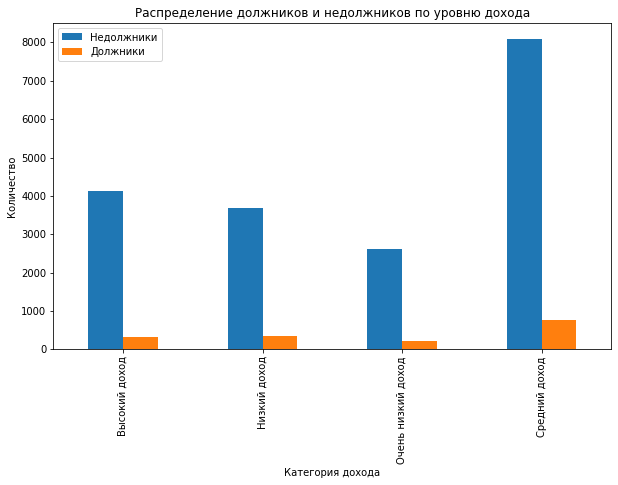

In [160]:
# Место для вашего кода
income_pivot = df.pivot_table(index='income_category', columns='debt', values='total_income', aggfunc='count')
display(income_pivot)
income_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение должников и недолжников по уровню дохода')
plt.xlabel('Категория дохода')
plt.ylabel('Количество')
plt.legend(['Недолжники', 'Должники'])

- __Образование__

debt,0,1
education,,
bachelor's degree,4377.0,254.0
graduate degree,6.0,NaN
primary education,248.0,31.0
secondary education,13240.0,1303.0
some college,641.0,61.0


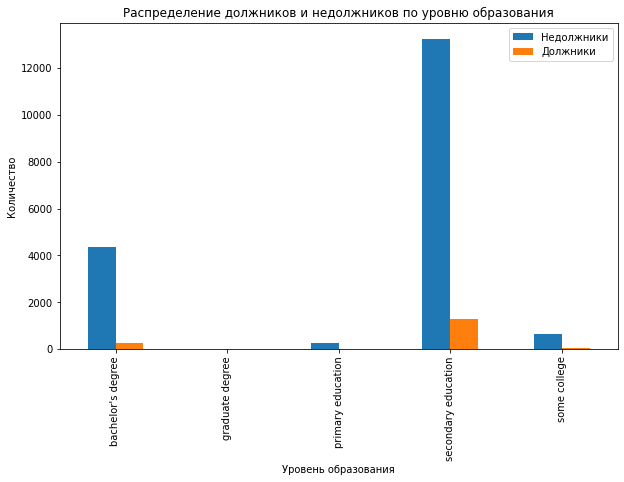

In [161]:
education_pivot = df.pivot_table(index='education', columns='debt', values='total_income', aggfunc='count')
display(education_pivot)
education_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение должников и недолжников по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.legend(['Недолжники', 'Должники'])

- __Возраст__

debt,0,1
age_category,,
до 40 лет,7493,861
после 40 лет,11019,788


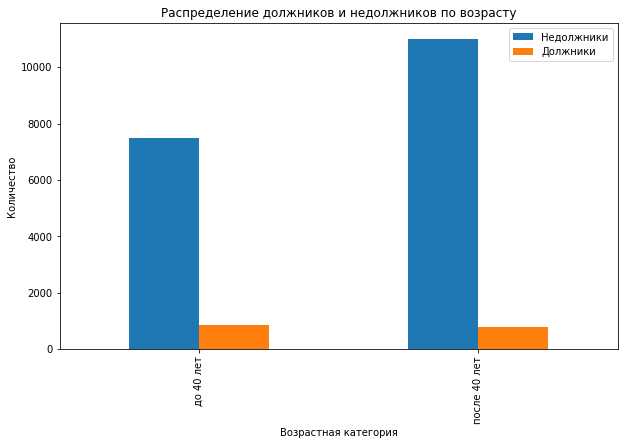

In [162]:
age_pivot = df.pivot_table(index='age_category', columns='debt', values='dob_years', aggfunc='count')
display(age_pivot)
age_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение должников и недолжников по возрасту')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество')
plt.legend(['Недолжники', 'Должники'])

- __Количество детей__

debt,0,1
childrens_category,,
без детей,12335,1011
от одного до двух,5856,608
от трёх и больше,321,30


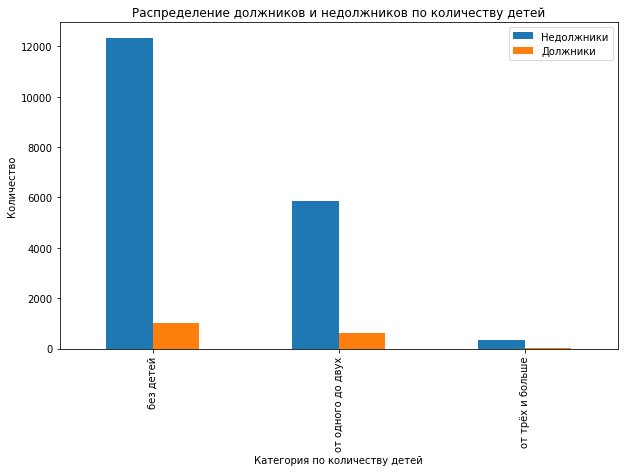

In [163]:
children_pivot = df.pivot_table(index='childrens_category', columns='debt', values='children', aggfunc='count')
display(children_pivot)
children_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение должников и недолжников по количеству детей')
plt.xlabel('Категория по количеству детей')
plt.ylabel('Количество')
plt.legend(['Недолжники', 'Должники'])


***Проверьте исследовательскую гипотезу***: у клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту.



1. Сравним количество должников и недолжников в зависимости от количества детей.
2. Построим график для сравнения

In [164]:
# Место для вашего кода
children_debt_pivot = df.pivot_table(index='childrens_category', columns='debt', values='children', aggfunc='count', fill_value=0)
children_debt_pivot

debt,0,1
childrens_category,,
без детей,12335,1011
от одного до двух,5856,608
от трёх и больше,321,30


In [165]:
# Вычислим долю должников в каждой категории
children_debt_pivot['debt_ratio'] = children_debt_pivot[1] / (children_debt_pivot[0] + children_debt_pivot[1])
children_debt_pivot

debt,0,1,debt_ratio
childrens_category,,,
без детей,12335,1011,0.075753
от одного до двух,5856,608,0.094059
от трёх и больше,321,30,0.085470


In [166]:
# Вычислим долю должников в каждой категории
children_debt_pivot['debt_ratio'] = children_debt_pivot[1] / (children_debt_pivot[0] + children_debt_pivot[1])

Text(0, 0.5, 'Доля должников')

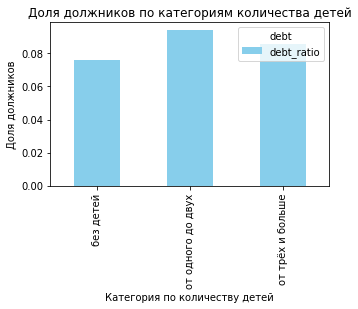

In [167]:
children_debt_pivot[['debt_ratio']].plot(kind='bar', figsize=(5, 3), color='skyblue')
plt.title('Доля должников по категориям количества детей')
plt.xlabel('Категория по количеству детей')
plt.ylabel('Доля должников')


***Проверьте исследовательскую гипотезу***: одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.



1. Нужно создать 2 группы
   - Одинокие мужчины с низким доходом.
   - Семейные мужчины со средним доходом.
2. Построить сводные таблицы
3. Построить графики визуализрующие итог

- выведем только те столбцы, что будем анализировать

In [168]:
display(df[['gender','family_status', 'income_category','debt']].head(10))

,gender,family_status,income_category,debt
0,F,married,Высокий доход,0
1,F,married,Низкий доход,0
2,M,married,Средний доход,0
3,M,married,Высокий доход,0
4,F,civil partnership,Средний доход,0
5,M,civil partnership,Высокий доход,0
6,F,married,Высокий доход,0
7,M,married,Средний доход,0
8,F,civil partnership,Низкий доход,0
9,M,married,Средний доход,0


- проверим уникальные значения для столбцов gender	и family_status	

In [169]:
df['gender'].unique()

array(['F', 'M', 'Unknown'], dtype=object)

In [170]:
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

- видно, что есть такой вариант как 'civil partnership', но в условии не оговоренно что считать сименйм мужчиной
- поэтому будем рассматривать только вариант 'married'

In [171]:
# Группы
single_low_income_men = df[(df['gender'] == 'M') & (df['family_status'] == 'unmarried') & (df['income_category'] == 'Низкий доход')]
display(single_low_income_men.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,age_category,childrens_category
479,0,-3029.321191,29,secondary education,1,unmarried,4,M,employee,0,17784.268,housing,Низкий доход,до 40 лет,без детей
834,0,-1523.564571,29,bachelor's degree,0,unmarried,4,M,employee,0,14129.326,purchase of the house,Низкий доход,до 40 лет,без детей
1085,0,-1618.549219,29,secondary education,1,unmarried,4,M,civil servant,0,16564.878,housing transactions,Низкий доход,до 40 лет,без детей
1277,0,-1205.259599,20,secondary education,1,unmarried,4,M,employee,0,14782.012,housing,Низкий доход,до 40 лет,без детей
1281,1,-318.559894,43,secondary education,1,unmarried,4,M,business,0,17122.443,housing renovation,Низкий доход,после 40 лет,от одного до двух
1286,0,-5020.574409,35,secondary education,1,unmarried,4,M,employee,0,14321.866,real estate transactions,Низкий доход,до 40 лет,без детей
1344,0,-1418.055816,24,secondary education,1,unmarried,4,M,employee,1,17464.201,buying my own car,Низкий доход,до 40 лет,без детей
1430,0,-340.644655,27,secondary education,1,unmarried,4,M,employee,0,18332.241,building a property,Низкий доход,до 40 лет,без детей
1741,0,-405.802043,25,secondary education,1,unmarried,4,M,business,0,18242.696,buying my own car,Низкий доход,до 40 лет,без детей
1847,2,-679.171126,35,secondary education,1,unmarried,4,M,employee,0,16890.247,housing,Низкий доход,до 40 лет,от одного до двух


In [172]:
married_medium_income_men = df[(df['gender'] == 'M') & (df['family_status'] == 'married') & (df['income_category'] =='Средний доход' )]
display(married_medium_income_men.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,age_category,childrens_category
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Средний доход,до 40 лет,без детей
7,0,-152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,Средний доход,после 40 лет,без детей
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,Средний доход,после 40 лет,без детей
26,0,0.000000,41,secondary education,1,married,0,M,civil servant,0,23202.870,education,Средний доход,после 40 лет,без детей
60,1,-2534.462390,48,secondary education,1,married,0,M,employee,0,20784.365,to become educated,Средний доход,после 40 лет,от одного до двух
66,0,-916.428829,28,secondary education,1,married,0,M,employee,0,23234.324,to become educated,Средний доход,до 40 лет,без детей
72,1,0.000000,32,bachelor's degree,0,married,0,M,civil servant,0,23202.870,transactions with commercial real estate,Средний доход,до 40 лет,от одного до двух
76,1,-2252.192722,44,bachelor's degree,0,married,0,M,employee,0,23838.725,buying a second-hand car,Средний доход,после 40 лет,от одного до двух
78,0,359722.945074,61,bachelor's degree,0,married,0,M,retiree,0,28020.423,purchase of a car,Средний доход,после 40 лет,без детей
83,0,0.000000,52,secondary education,1,married,0,M,employee,0,23202.870,housing,Средний доход,после 40 лет,без детей


In [173]:
# Подсчет должников в каждой группе
single_low_income_men_debt_ratio = single_low_income_men['debt'].mean()
married_medium_income_men_debt_ratio = married_medium_income_men['debt'].mean()
print(f'Доля должников среди одиноких мужчин с низким доходом: {single_low_income_men_debt_ratio}')
print(f'Доля должников среди семейных мужчин со средним доходом: {married_medium_income_men_debt_ratio}')

Доля должников среди одиноких мужчин с низким доходом: 0.16939890710382513
Доля должников среди семейных мужчин со средним доходом: 0.09852717115286948


In [174]:
# Сводные таблицы
single_low_income_men_pivot = single_low_income_men.pivot_table(index='family_status', columns='debt', values='total_income', aggfunc='count')
married_medium_income_men_pivot = married_medium_income_men.pivot_table(index='family_status', columns='debt', values='total_income', aggfunc='count')

display(single_low_income_men_pivot)
print('')
display(married_medium_income_men_pivot)

debt,0,1
family_status,,
unmarried,152,31


debt,0,1
family_status,,
married,1775,194


Text(0, 0.5, 'Доля должников')

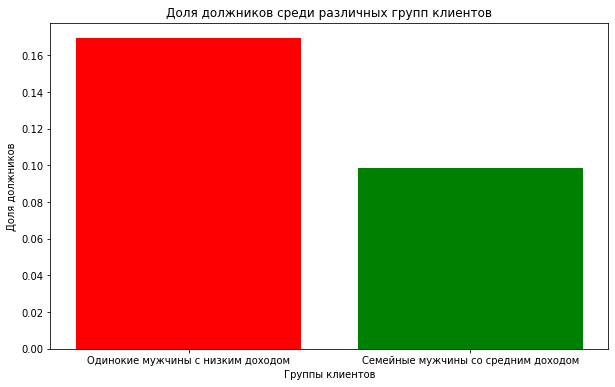

In [175]:
import matplotlib.pyplot as plt

# Визуализация
labels = ['Одинокие мужчины с низким доходом', 'Семейные мужчины со средним доходом']
debt_ratios = [single_low_income_men_debt_ratio, married_medium_income_men_debt_ratio]

plt.figure(figsize=(10, 6))
plt.bar(labels, debt_ratios, color=['red', 'green'])
plt.title('Доля должников среди различных групп клиентов')
plt.xlabel('Группы клиентов')
plt.ylabel('Доля должников')

<div class="alert alert-info">
  <b> * <a href="#ch0">к содержанию</a> </b> 
</div>


---